In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn


In [2]:
df=pd.read_csv('data/Corona_NLP_train.csv',encoding='latin-1')

In [3]:
df_test=pd.read_csv('data/Corona_NLP_test.csv')

In [4]:
df_test

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


In [5]:
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [6]:
df_nona=df.dropna()

In [7]:
df_nona['Sentiment'].value_counts()

Sentiment
Positive              9110
Negative              7763
Neutral               6172
Extremely Positive    5273
Extremely Negative    4249
Name: count, dtype: int64

<Axes: xlabel='Sentiment'>

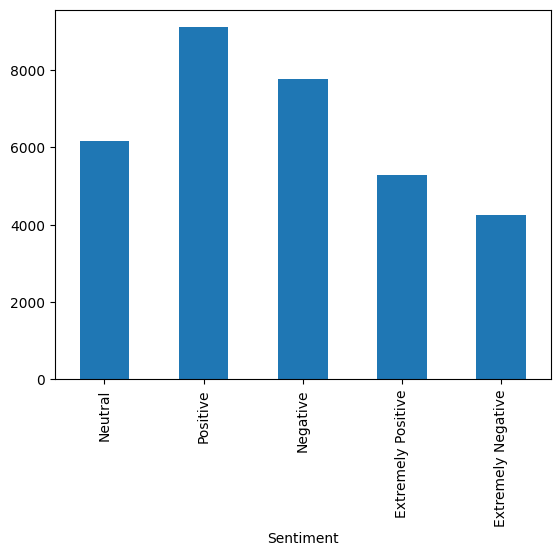

In [8]:
df_nona['Sentiment'].value_counts(sort=False).plot(kind='bar')

In [9]:
X=df_nona[['Location','TweetAt','OriginalTweet']]
Y=df_nona['Sentiment']

In [10]:
X.head()

,Location,TweetAt,OriginalTweet
0,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1,UK,16-03-2020,advice Talk to your neighbours family to excha...
2,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...
5,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...
6,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...


In [11]:
#convert all tweets to lower
X['OriginalTweet'][0].lower()

'@menyrbie @phil_gahan @chrisitv https://t.co/ifz9fan2pa and https://t.co/xx6ghgfzcc and https://t.co/i2nlzdxno8'

In [12]:
#data cleaning
import re
def rem_url(word):
    # s="https://2333hsjdn hih @we"
    ans=re.sub(r"@\S+|https\S+",'',word,flags=re.MULTILINE)
    print("after",ans)
    return ans
# re.sub(r"\S*https?:\S*",'',s)# X['OriginalTweet'][0]

In [13]:
import spacy
import string

In [15]:
def prep(sentence):
    #make tokens
    nlp=spacy.load('en_core_web_sm')
    punctuations = string.punctuation
    stopwords = spacy.lang.en.stop_words.STOP_WORDS
    sentence=sentence.lower()
    doc=nlp(sentence)
    # for token in doc:
        # print(token,token.lemma_)
    tokens=[word.lemma_ for word in doc]
    # print(tokens)
    pure_tok=[word for word in tokens if word not in punctuations and word not in stopwords]
    # print(pure_tok)
    clean_tok=[rem_url(word) for word in pure_tok]
    # print(clean_tok)
    processed_text = ' '.join(clean_tok)

    return processed_text
    


In [16]:
import spacy
import string

nlp=spacy.load('en_core_web_sm')
punctuations = string.punctuation
stopwords = spacy.lang.en.stop_words.STOP_WORDS
test_string="oh my gosh this is weirdly HHHHy https://dgdgd @hh https://yyy.com/hh@bnn_235 hhhhu"
# prep(nlp,test_string,stopwords)



In [17]:
df['cleanTweet'] = df['OriginalTweet'][:100].apply(prep)
# df['lower'] = df['text'].apply(lambda x: " ".join(x.lower()  for x in x.split()))


after 
after 
after 
after 
after 
after 
after advice
after talk
after neighbour
after family
after exchange
after phone
after number
after create
after contact
after list
after phone
after number
after neighbours
after schools
after employer
after chemist
after gp
after set
after online
after shopping
after account
after poss
after adequate
after supply
after regular
after med
after order
after coronavirus
after australia
after woolworth
after elderly
after disabled
after dedicated
after shopping
after hour
after amid
after covid-19
after outbreak
after 
after food
after stock
after ...
after 


after panic
after food
after need
after 

after stay
after calm
after stay
after safe
after 


after covid19france
after covid_19
after covid19
after coronaviru
after confinement
after confinementotal
after confinementgeneral
after 
after I
after ready
after supermarket
after covid19
after outbreak
after 


after I
after paranoid
after food
after stock
after litteraly
after coronavirus
after 

In [18]:
df[['cleanTweet','OriginalTweet']].head(100)

,cleanTweet,OriginalTweet
0,,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1,advice talk neighbour family exchange phone nu...,advice Talk to your neighbours family to excha...
2,coronavirus australia woolworth elderly disabl...,Coronavirus Australia: Woolworths to give elde...
3,food stock ... \r\r\n\r\r\n panic food need \r...,My food stock is not the only one which is emp...
4,I ready supermarket covid19 outbreak \r\r\n\r\...,"Me, ready to go at supermarket during the #COV..."
...,...,...
95,worried covid-19 \r\r\n\r\r\n I worried people...,Worried about COVID-19? \r\r\n\r\r\nI more wor...
96,. big supermarket chain united states \r\r\n\r...,.@kroger is the biggest supermarket chain in t...
97,instead pay sick leave provide 2 week pay le...,"@kroger Instead of paid sick leave, @kroger is..."
98,I follow I shop day ago pain necessary protect...,I followed this when I went shopping a few day...


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8)

In [28]:
pip install textblob


     -------------------------------------- 626.3/626.3 kB 2.2 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
import nltk
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob


In [30]:
def get_sentiment(text):

    scores = TextBlob(text).sentiment.polarity

    sentiment = 1 if scores > 0 else 0

    return sentiment

In [32]:
df['sentiment'] = df['cleanTweet'][:100].apply(get_sentiment)


In [34]:
df[['cleanTweet','sentiment','Sentiment']].head(100)

,cleanTweet,sentiment,Sentiment
0,,0.0,Neutral
1,advice talk neighbour family exchange phone nu...,1.0,Positive
2,coronavirus australia woolworth elderly disabl...,0.0,Positive
3,food stock ... \r\r\n\r\r\n panic food need \r...,1.0,Positive
4,I ready supermarket covid19 outbreak \r\r\n\r\...,1.0,Extremely Negative
...,...,...,...
95,worried covid-19 \r\r\n\r\r\n I worried people...,1.0,Extremely Positive
96,. big supermarket chain united states \r\r\n\r...,0.0,Positive
97,instead pay sick leave provide 2 week pay le...,0.0,Positive
98,I follow I shop day ago pain necessary protect...,0.0,Positive


In [36]:
for i in range(100):
    if df['Sentiment'][i] in ['Positive','Extremely Positive']:
        df['SentimentDigit']=1.0
    else:
        df['SentimentDigit']=0.0

In [38]:
df[['cleanTweet','sentiment','SentimentDigit','Sentiment']].head(100)

,cleanTweet,sentiment,SentimentDigit,Sentiment
0,,0.0,0.0,Neutral
1,advice talk neighbour family exchange phone nu...,1.0,0.0,Positive
2,coronavirus australia woolworth elderly disabl...,0.0,0.0,Positive
3,food stock ... \r\r\n\r\r\n panic food need \r...,1.0,0.0,Positive
4,I ready supermarket covid19 outbreak \r\r\n\r\...,1.0,0.0,Extremely Negative
...,...,...,...,...
95,worried covid-19 \r\r\n\r\r\n I worried people...,1.0,0.0,Extremely Positive
96,. big supermarket chain united states \r\r\n\r...,0.0,0.0,Positive
97,instead pay sick leave provide 2 week pay le...,0.0,0.0,Positive
98,I follow I shop day ago pain necessary protect...,0.0,0.0,Positive


In [39]:
con=0
count=[con+1 if df['sentiment'][i]==df['SentimentDigit'][i] else  for i in range(100)]

SyntaxError: expected 'else' after 'if' expression (3936265474.py, line 2)

In [40]:
matches= df['sentiment']==df['SentimentDigit']

In [43]:
matches[:100].value_counts()

True     59
False    41
Name: count, dtype: int64